In [1]:
import seaborn as sns
import pandas as pd
import numpy as np




In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

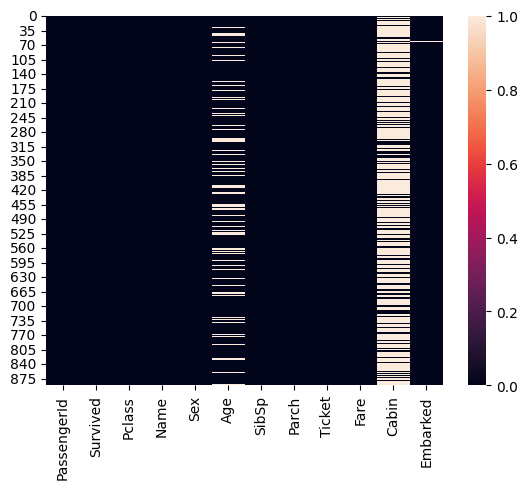

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.dropna().shape

(183, 12)

In [7]:
df.shape

(891, 12)

In [8]:
# handling missing values by column wise 

df.dropna(axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


In [9]:
# Imputation techniques



IMPUTATION TECHNIQUE

1-Mean value computation

C:\Users\mannu\AppData\Local\Temp\ipykernel_19376\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
c:\Users\mannu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mannu\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating inste

<Axes: xlabel='Age', ylabel='Density'>

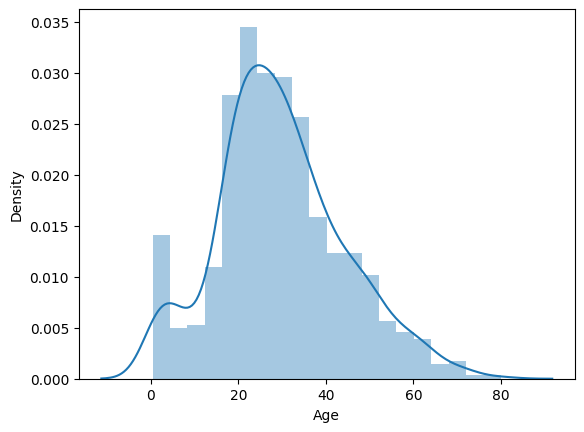

In [10]:
sns.distplot(df['Age'])

In [11]:
# Hearing now if we check how many missing values are there


df.Age.isnull().sum()

177

In [12]:
# Filling the null value which was showing NAN by mean value

df['Age_mean'] = df['Age'].fillna(df['Age'].mean)

In [13]:
df[['Age_mean', 'Age']]

,Age_mean,Age
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,<bound method Series.mean of 0 22.0\n1 ...,NaN
889,26.0,26.0


In [14]:
# This Technique is worked well when your data is normally distributed

2-Median Value Imputation


In [15]:
df['Age_median'] = df['Age'].fillna(df['Age'].median)

In [16]:
df[['Age_median','Age_mean', 'Age']]

,Age_median,Age_mean,Age
0,22.0,22.0,22.0
1,38.0,38.0,38.0
2,26.0,26.0,26.0
3,35.0,35.0,35.0
4,35.0,35.0,35.0
...,...,...,...
886,27.0,27.0,27.0
887,19.0,19.0,19.0
888,<bound method Series.median of 0 22.0\n1 ...,<bound method Series.mean of 0 22.0\n1 ...,NaN
889,26.0,26.0,26.0


3 - Mode Value Imputation is more usefull in measure of categorical features

In [17]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_median
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,62.0


In [18]:
df['Embarked_median'] = df['Embarked'].fillna(df['Embarked'].median)

In [19]:
df['Embarked_median']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked_median, Length: 891, dtype: object

In [20]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
df[df['Age'].notna()]['Embarked'].mode()[0]

'S'

In [22]:
mode = df[df['Age'].notna()]['Embarked'].mode()[0]

In [23]:
mode


'S'

In [24]:
df['Embarked_mode'] = df['Embarked'].fillna(mode)

In [25]:
df[['Embarked_mode', 'Embarked']]

,Embarked_mode,Embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [26]:
df['Embarked_mode'].isnull().sum()

0